## Project 02
#### Question 01

The input data has four variables. All the four variables have near about the same range thus there doesn't exist a need for performing standardization. Given four variables we can predict 4 different classes. We will be creating dummy variable for each class of target variable (species). This is the transformation that would be performed on the output variable. From the correlation plot seen below Petal Length, Petal Width and Sepal Length are highly correlated which gives us a rough idea that adding all the three variables in the model would lead to dimensionality issue. It would be wise to drop atleast one of these three variable. 

#### Question 02
Dimesionality reduction using Lasso
From the plot of alpha value versus mean absolute coefficient it can be said that Sepal Length variable reaches zero at a very low value of alpha thus can be readily removed from the model. Petal Width on the other hand reaches zero at a considerable value of aplha (at ~0.045). Variables reduction after removing Sepal Length might cause an issue, as number of categories will be more than than number of variables and might not give appropriate decision boundaries but for simplicity lets consider only 2 variables ['Petal_Length','Sepal_Width']
If we come across such issue it can be resolved by increasing the dimensionality of the input data by including higher order variables. Lasso can also be applied again on the increased input data if necessary. You can find below that if done so the finalized variables would be ['Petal_Length2', 'Sepal_Width2','Petal_Length*Sepal_Width']

#### Question 03
We need our validation set to consist of all the labels of output variable. We need to verify that our model predicts all the output classes correctly. If our model is biased towards class A (other class being B) and the validation set consist of only class A then we will get 100% accuracy even though it doesn't predict class B well. This will lead to incorrect conclusion. 

#### Question 04
(a) KNN classification: <br>
Based on the context of the problem we can choose any metric that penalizes values which are far from each other more than the ones which are close. Here we can choose Euclidean metric. As our holdout set is very less (15 values) and uniformaly distributed within classes the accuracy (error) versus k would fluctuate based on the train and test split done. As one (sentosa) of our category is very far from the rest of the two, based on our choosen variables, value of k would affect mainly the later. Based on the seed value '12' accuracy is maximum at k =5.

(b) QDA: <br>
$\delta 1 $  =  -14.4$X1^2$ -3.347$X2^2$ + 3.36$X1X2$ + 25.96$X1$ + 27.97$X2$ - 63.608<br>
$\delta 2 $  =  -3.00$X1^2$ -7.785$X2^2$ + 5.16$X1X2$ + 11.28$X1$ - 21.18$X2$ - 51.963<br>
$\delta 3 $  =  -1.95$X1^2$ -6.061$X2^2$ + 3.04$X1X2$ + 12.66$X1$ + 19.08$X2$ - 63.238<br>

Decision Boundary1: <br>
-11.4$X1^2$ + 4.438$X2^2$ - 1.80$X1X2$ + 14.68$X1$ + 49.15$X2$ - 11.645 = 0 --- Hyperbola <br>
Decision Boundary2: <br>
-1.05$X1^2$ - 1.724$X2^2$ + 2.12$X1X2$ -  1.38$X1$ + 40.26$X2$ + 11.275 = 0  --- Ellipse <br>

These decision boundaries should exproximately lie along the KNN decision boundaries that can be seen in the graph below.These boundaries do intersect. We do not need any basis transformation as we get well defined distinct boundaries which does classify the output classes reasonably well. <br>

(c) OLS Regression: <br>
Find a visual representation of the decision boundaries created when only two variables(['Petal_Length','Sepal_Width']) are included in the OLS model. As we can see only two variables aren't enough to classify the categories properly. To work around this issue we will be dividing the data in two parts based on the output classes and classify the species separately. By doing so we thus get two linear boundaries as: <br>
Boundary1: <br>
0.3259*X2 = 0.6083*X1- 0.7433 <br>
Boundary2: <br>
0.45122*X2 = 1.03396*X1 - 3.7744 <br>

#### Question 05
Accuracy values on the holdout data: <br>
KNN: 100% <br>
QDA: 93.33% <br>
OLS: 93.33% <br>

Based on accuracy the ranking should be:<br>
KNN,QDA and OLS <br>
but we can see from the decision boundary plots of all the classification model, the decision boundaries for KNN are very uneven and would lead to uncertain results around the borders and lead to high variance. Whereas QDA result in smoother boundaries and would lead to less variance. Even OLS is a good candidate for better decision boundaries but require data splitting and calculating decision boundaries separately. The best solution based on the criterions just mentioned QDA wins!

#### Question 06
Iris p len p wid s len s wid <br>
A 3.0 0.5 4.3 6.8 <br>
B 5.3 1.3 2.0 3.0 <br>

A would be classifies under Setosa and B would be classifies under Virginica based on QDA classification model

### Importing libraries

In [1]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.colors
from matplotlib.colors import ListedColormap

In [2]:
#importing data
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris_data =pd.DataFrame(iris.data)
iris_data.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_Width']
iris_data['target'] = iris.target


### Pairplot

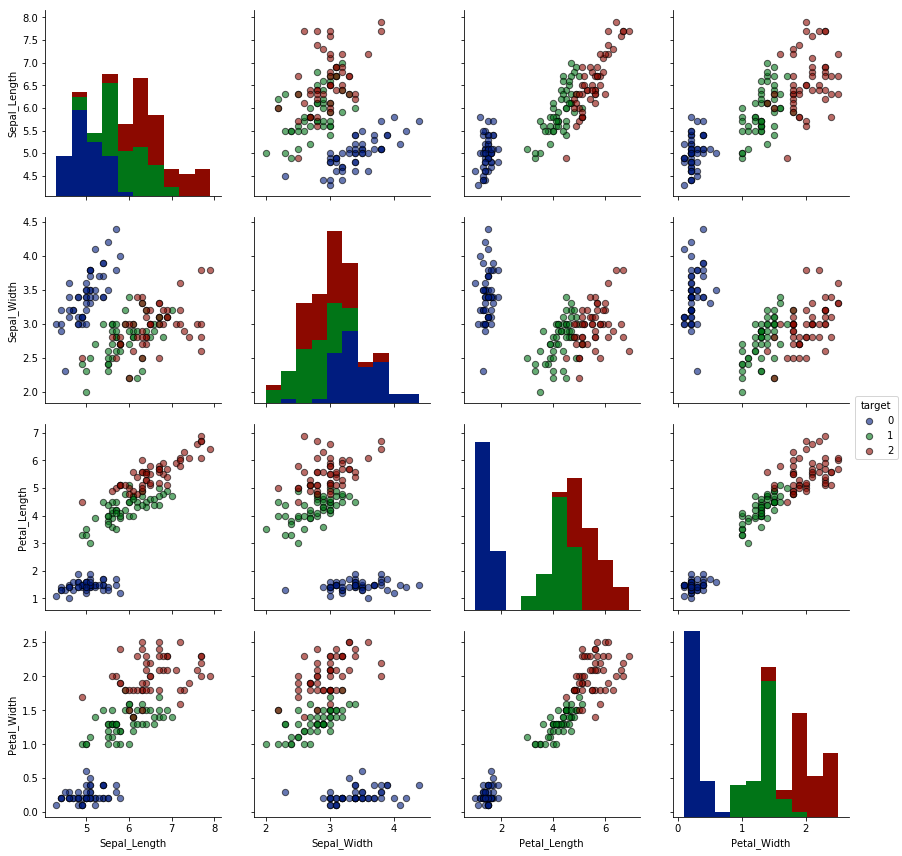

In [4]:
plt.style.use('seaborn-dark-palette')
plt.figure()
sns.pairplot(iris_data, vars =['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_Width'], 
             hue = "target", plot_kws = {'alpha': 0.6, 's': 40, 'edgecolor': 'k'},size = 3)
plt.show()

In [5]:
plt.rcParams['figure.figsize'] = (10,6)

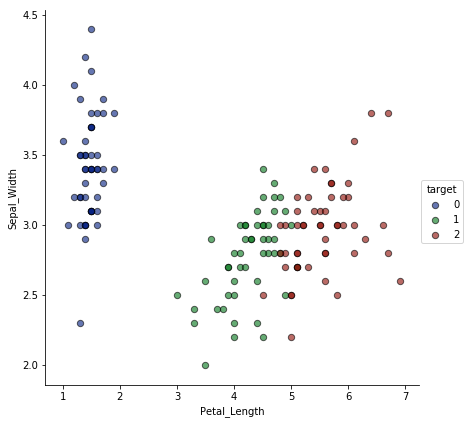

In [6]:
plt.style.use('seaborn-dark-palette')
sns.pairplot(x_vars=['Petal_Length'], y_vars=['Sepal_Width'], plot_kws = {'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
             data=iris_data, hue='target', size=6)
plt.show()

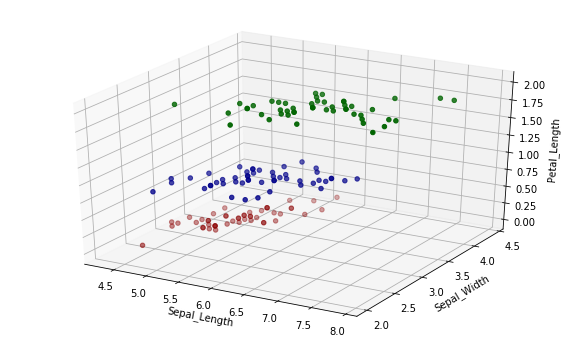

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['darkred', 'darkblue', 'darkgreen'])
ax.scatter(xs= iris_data['Sepal_Length'],ys= iris_data['Sepal_Width'], zs= iris_data['target'], c= iris_data['target'],
          cmap= cmap)

ax.set_xlabel('Sepal_Length')
ax.set_ylabel('Sepal_Width')
ax.set_zlabel('Petal_Length')
plt.show()

### Correlation plot

In [8]:
correlation = iris_data.corr()
correlation

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,target
Sepal_Length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal_Length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal_Width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


### Creating dummies

In [9]:
iris_data['setosa'] = [1 if iris_data['target'][i] ==0 else 0 for i in range(len(iris_data))]
iris_data['versicolor'] = [1 if iris_data['target'][i] ==1 else 0 for i in range(len(iris_data))]
iris_data['virginica'] = [1 if iris_data['target'][i] ==2 else 0 for i in range(len(iris_data))]

### Lasso for variable selection

In [10]:
clf = linear_model.Lasso(alpha=0.03)

In [11]:
Y = iris_data[['setosa','versicolor','virginica']]
X = iris_data[['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_Width']]
clf.fit(X,Y)

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
print(clf.coef_)

[[ 0.          0.100118   -0.22729554 -0.        ]
 [ 0.         -0.32849403  0.0103915  -0.        ]
 [ 0.          0.          0.0917171   0.22067862]]


### Selecting the right alpha value

In [13]:
coeff_lasso = pd.DataFrame()
for i in range(50):
    p = i/500 
    clf = linear_model.Lasso(alpha=p)
    clf.fit(X,Y)
    if i == 0:
        print('Normal Linear Regression coeffs:')
        print(clf.coef_)
    total_coeff = pd.DataFrame(clf.coef_)
    coeff_lasso =coeff_lasso.append(total_coeff.abs().mean(), ignore_index= True)

Normal Linear Regression coeffs:
[[ 0.06564305  0.242473   -0.22276138 -0.06335141]
 [-0.02154464 -0.44070556  0.21852137 -0.48319129]
 [-0.04409841  0.19823256  0.00424001  0.54654271]]


C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\Sanchayni\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sanchayni\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


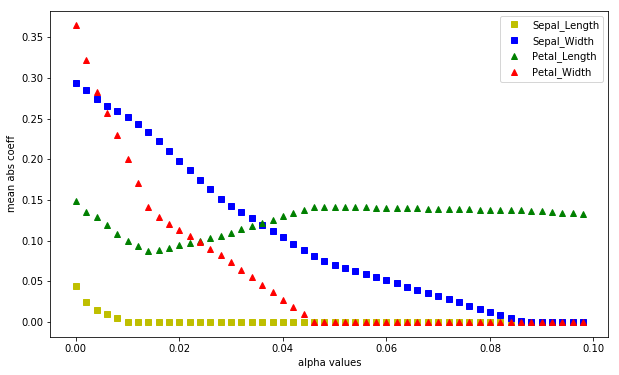

In [444]:
index = [x/500 for x in range(50)]
plt.plot(index,coeff_lasso[0] , 'ys', index,coeff_lasso[1], 
         'bs',index,coeff_lasso[2], 'g^',index,coeff_lasso[3], 'r^')
plt.legend(['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_Width'])
plt.xlabel('alpha values')
plt.ylabel('mean abs coeff')
plt.show()

Lets pick aplha(lambda) value to be near 0.05. As we can see Sepal Length reaches zero at around 0.01 and Petal Width reaches zero after that. 

In [14]:
clf = linear_model.Lasso(alpha=0.045)
clf.fit(X,Y)
print(clf.coef_)

[[ 0.          0.01262575 -0.23148633 -0.        ]
 [ 0.         -0.24100212  0.01458226 -0.        ]
 [ 0.          0.          0.17284343  0.01417301]]


In [15]:
Xnew = pd.DataFrame()
Xnew['Petal_Length'] = iris_data['Petal_Length']
Xnew['Sepal_Width'] = iris_data['Sepal_Width']

In [16]:
Xnew['Petal_Length2'] = [x**2 for x in iris_data['Petal_Length']]
Xnew['Sepal_Width2'] = [x**2 for x in iris_data['Sepal_Width']]
Xnew['Petal_Length*Sepal_Width'] = iris_data['Petal_Length']* iris_data['Sepal_Width']

### Selecting the right alpha value

In [17]:
coeff_lasso_all = pd.DataFrame()
for i in range(50):
    p = (i+10)/500 
    clf = linear_model.Lasso(alpha=p)
    clf.fit(Xnew,Y)
    if i == 0:
        print('Normal Linear Regression coeffs:')
        print(clf.coef_)
    total_coeff = pd.DataFrame(clf.coef_)
    coeff_lasso_all =coeff_lasso_all.append(total_coeff.abs().mean(), ignore_index= True)

Normal Linear Regression coeffs:
[[-0.19659943  0.          0.02684204  0.06407833 -0.06656704]
 [ 0.48899853 -0.         -0.11290434 -0.08125054  0.10459739]
 [-0.          0.          0.05729885  0.04072025 -0.06236725]]


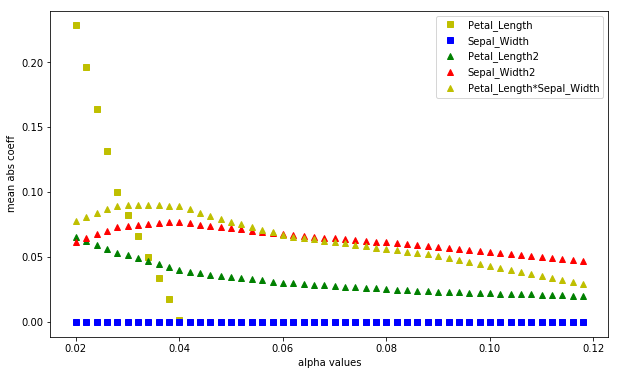

In [18]:
index = [(x+10)/500 for x in range(50)]
plt.plot(index,coeff_lasso_all[0] , 'ys', index,coeff_lasso_all[1], 
         'bs',index,coeff_lasso_all[2], 'g^',index,coeff_lasso_all[3], 'r^',
        index,coeff_lasso_all[4], 'y^')
plt.legend(['Petal_Length', 'Sepal_Width', 'Petal_Length2', 'Sepal_Width2',
       'Petal_Length*Sepal_Width'])
plt.xlabel('alpha values')
plt.ylabel('mean abs coeff')
plt.show()

In [19]:
clf = linear_model.Lasso(alpha=0.085)
clf.fit(Xnew,Y)
print('Coefficients of normal Linear regression:')
print(Xnew.columns)
print(clf.coef_)

Coefficients of normal Linear regression:
Index(['Petal_Length', 'Sepal_Width', 'Petal_Length2', 'Sepal_Width2',
       'Petal_Length*Sepal_Width'],
      dtype='object')
[[-0.          0.         -0.          0.06774675 -0.06482341]
 [ 0.         -0.         -0.04341999 -0.10056016  0.09638752]
 [-0.          0.          0.02957029  0.0110061  -0.        ]]


### Linear regression using the selected variables

In [20]:
clf = linear_model.Lasso(alpha=0.00)
clf.fit(Xnew,Y)
print(Xnew.columns)
print(clf.coef_)

Index(['Petal_Length', 'Sepal_Width', 'Petal_Length2', 'Sepal_Width2',
       'Petal_Length*Sepal_Width'],
      dtype='object')
[[-0.58962104  0.75858113  0.06420624 -0.09011382 -0.03222033]
 [ 0.8058873  -1.3770652  -0.14910974  0.15979684  0.09215365]
 [-0.21626626  0.61848407  0.0849035  -0.06968302 -0.05993332]]


C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Sanchayni\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sanchayni\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Finalized variables

Final variables: 'Petal_Length2', 'Sepal_Width2', 'Petal_Length*Sepal_Width'

In [21]:
Xfinal = Xnew[['Petal_Length2', 'Sepal_Width2','Petal_Length*Sepal_Width']]
Xfinal.columns

Index(['Petal_Length2', 'Sepal_Width2', 'Petal_Length*Sepal_Width'], dtype='object')

### Lets plot our finalized variable and species 

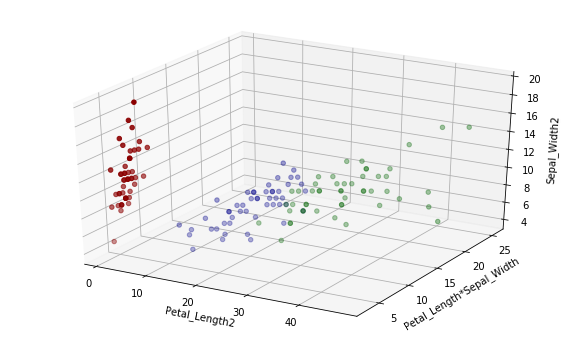

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['darkred', 'darkblue', 'darkgreen'])
ax.scatter(xs= Xfinal['Petal_Length2'],zs= Xfinal['Sepal_Width2'], ys= Xfinal['Petal_Length*Sepal_Width'],
           c= iris_data['target'],
          cmap= cmap)

ax.set_xlabel('Petal_Length2')
ax.set_zlabel('Sepal_Width2')
ax.set_ylabel('Petal_Length*Sepal_Width')
plt.show()

### Linear model

In [23]:
regr = linear_model.LinearRegression()
regr.fit(Xfinal, Y)
print(Xfinal.columns)
print(regr.coef_)

Index(['Petal_Length2', 'Sepal_Width2', 'Petal_Length*Sepal_Width'], dtype='object')
[[ 0.03001107  0.10107553 -0.13442397]
 [-0.10084723 -0.15450706  0.22775852]
 [ 0.07083616  0.05343154 -0.09333455]]


### Splitting Data

### For simplicity lets say we take 2 first order variables

(1) Petal_Length
(2) Sepal_Width

In [24]:
Xknn = iris_data[['Petal_Length','Sepal_Width']]

In [25]:
from sklearn.cross_validation import train_test_split

C:\Users\Sanchayni\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
np.random.seed(12)
X_train, X_test, Y_train, Y_test = train_test_split(Xknn, iris_data['target'], 
                                                   test_size=0.10,stratify = iris_data['target'])

### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier  

In [28]:
accuracy_knn = []

# Calculating error for K values between 1 and 15
for i in range(1, 15): 
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    accuracy_knn.append(sum(pred_i == Y_test)*100/len(X_test))

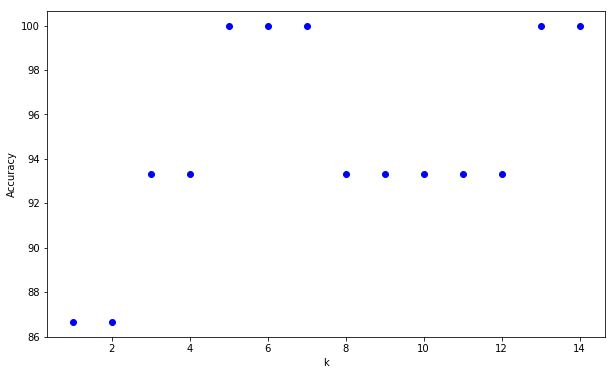

In [29]:
plt.scatter(range(1, 15),accuracy_knn,c= 'b',marker = 'o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
Y_pred = knn.predict(X_test)
print('Y actual:')
print(list(Y_test))
print('Y predicted:')
print(list(Y_pred))

Y actual:
[0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1]
Y predicted:
[0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1]


In [32]:
from sklearn.metrics import classification_report, confusion_matrix  
print('Confusion Matrix:\n',confusion_matrix(Y_test, Y_pred)) 
print('Accuracy:',np.round(sum(Y_test==Y_pred)*100/len(Y_test),3),'%')  

Confusion Matrix:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]
Accuracy: 100.0 %


### Plotting the KNN mesh

In [33]:
X = X_train
Y = Y_train
n_neighbors = 5
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train['Petal_Length'].min() - 1, X_train['Petal_Length'].max() + 1
y_min, y_max =  X_train['Sepal_Width'].min() - 1,  X_train['Sepal_Width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

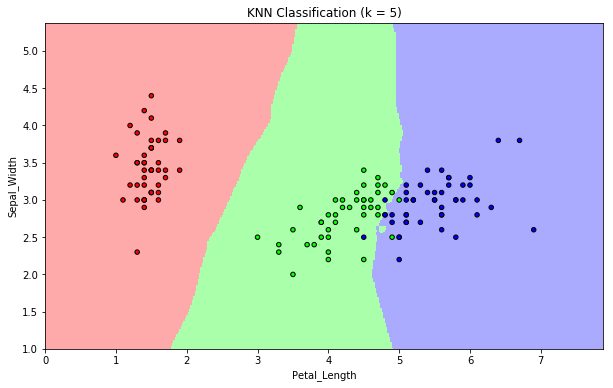

In [34]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['Petal_Length'], X['Sepal_Width'], c=Y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Width')
plt.title("KNN Classification (k = 5)")
plt.show()

### QDA

For QDA lets select only first order variables:

(1) Petal_Length
(2) Sepal_Width

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda = QuadraticDiscriminantAnalysis(store_covariance=True)

In [36]:
clf_qda.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=True, store_covariances=None, tol=0.0001)

In [37]:
print(clf_qda.means_)
print(clf_qda.covariance_)
qda_covariance =clf_qda.covariance_

[[1.46444444 3.42888889]
 [4.25111111 2.77333333]
 [5.51555556 2.96888889]]
[array([[0.03234343, 0.01241414],
       [0.01241414, 0.1580101 ]]), array([[0.24255556, 0.09343939],
       [0.09343939, 0.10290909]]), array([[0.26179798, 0.07299495],
       [0.07299495, 0.10446465]])]


In [38]:
print(-(np.log10(np.linalg.det(qda_covariance[0]))/2)+np.log10(0.333))
print(np.linalg.inv(qda_covariance[0]))

0.6748576236590207
[[31.87950952 -2.50462937]
 [-2.50462937  6.52548677]]


In [39]:
print(-(np.log10(np.linalg.det(qda_covariance[1]))/2)+np.log10(0.333))
print(np.linalg.inv(qda_covariance[1]))

0.41728161034684547
[[ 6.34057283 -5.75711317]
 [-5.75711317 14.94465797]]


In [40]:
print(-(np.log10(np.linalg.det(qda_covariance[2]))/2)+np.log10(0.333))
print(np.linalg.inv(qda_covariance[2]))

0.3510319200890038
[[ 4.74400035 -3.31488286]
 [-3.31488286 11.88889973]]


In [41]:
Y_pred_qda= clf_qda.predict(X_test)
print('Confusion Matrix:\n',confusion_matrix(Y_test, Y_pred_qda))
acc_qda = sum(Y_test==Y_pred_qda)/ len(Y_test)
print('accuracy:',np.round(acc_qda,3))

Confusion Matrix:
 [[5 0 0]
 [0 5 0]
 [0 1 4]]
accuracy: 0.933


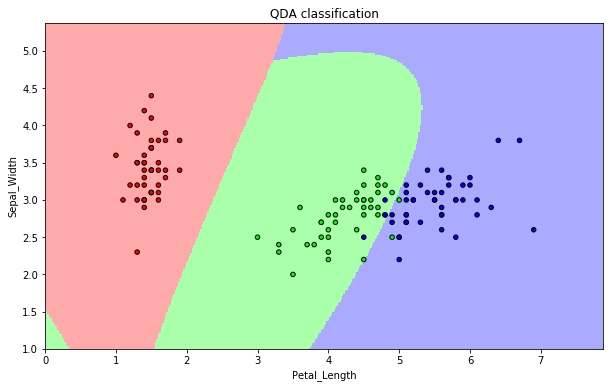

In [42]:
Z = clf_qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['Petal_Length'], X['Sepal_Width'], c=Y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Width')
plt.title('QDA classification')
plt.show()

### OLS

In [43]:
import statsmodels.api as sm

C:\Users\Sanchayni\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [44]:
Ydummy = iris_data[['setosa','versicolor','virginica']]

In [45]:
np.random.seed(4521)
X_train_ols, X_test_ols, Y_train_ols, Y_test_ols = train_test_split(Xknn, Ydummy, 
                                                   test_size=0.10)

In [46]:
ols_model = linear_model.LinearRegression()
ols = ols_model.fit(X_train_ols, Y_train_ols)

In [47]:
print('Coefficients:\n',ols.coef_)
print('Intercept:\n',ols.intercept_)

Coefficients:
 [[-0.2139629   0.29929887]
 [-0.00606516 -0.55855924]
 [ 0.22002806  0.25926038]]
Intercept:
 [ 0.22576837  2.06654388 -1.29231225]


In [48]:
Y_ols_pred= ols_model.predict(X_test_ols)

### Decision boundaries of OLS

$\delta 1 $ = 0.226 -0.214*X1 + 0.299*X2 <br>
$\delta 2 $ = 2.066 -0.006*X1 - 0.558*X2 <br>
$\delta 3 $ = -1.292 +0.220*X1 + 0.259*X2<br>

Decision boundary1: 0.8573X2 = 0.208X1 + 1.84 <br>
Decision boundary2: 0.817X2 = -0.226X1 + 3.358 <br>

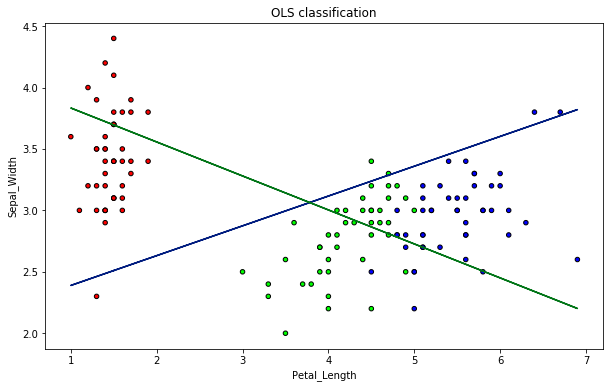

In [49]:
plt.scatter(X['Petal_Length'], X['Sepal_Width'], c=Y, cmap=cmap_bold, edgecolor='k', s=20)

plt.plot(X_train_ols['Petal_Length'],(X_train_ols['Petal_Length']*0.208+1.84)/0.8573)
#plt.plot(X_train_ols['Petal_Length'],(X_train_ols['Petal_Length']*0.434-1.5177)/0.0403)
plt.plot(X_train_ols['Petal_Length'],(-X_train_ols['Petal_Length']*0.226+3.358)/0.817)

plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Width')
plt.title('OLS classification')
plt.show()

Not an appropriate classification

In [50]:
Ydummy.head()
Data012 = pd.concat([Xknn,Ydummy],axis = 1)
Data012.head()

,Petal_Length,Sepal_Width,setosa,versicolor,virginica
0,1.4,3.5,1,0,0
1,1.4,3.0,1,0,0
2,1.3,3.2,1,0,0
3,1.5,3.1,1,0,0
4,1.4,3.6,1,0,0


In [51]:
Data01 = Data012[Data012['virginica']==0]
Data12 = Data012[Data012['setosa']==0]

### Creating decision boundaries by splitting the data

In [52]:
np.random.seed(1234)
X_train01, X_test01, Y_train01, Y_test01 = train_test_split(Data01[['Petal_Length','Sepal_Width']], 
                                                                    Data01[['setosa','versicolor']], test_size=0.10)

In [53]:
np.random.seed(234)
X_train12, X_test12, Y_train12, Y_test12 = train_test_split(Data12[['Petal_Length','Sepal_Width']], 
                                                                    Data12[['versicolor','virginica']], test_size=0.10)

In [54]:
ols_model01 = linear_model.LinearRegression()
ols01 = ols_model01.fit(X_train01, Y_train01)

Y_pred01 = pd.DataFrame(ols01.predict(X_test01))
Y_pred01[0][Y_pred01[0]>= 0.5] = 1
Y_pred01[0][Y_pred01[0]< 0.5] = 0

confusion_matrix(Y_test01['setosa'],  Y_pred01[0])


array([[5, 0],
       [0, 5]], dtype=int64)

In [55]:
ols_model12 = linear_model.LinearRegression()
ols12 = ols_model12.fit(X_train12, Y_train12)

Y_pred12 = pd.DataFrame(ols12.predict(X_test12))
Y_pred12[0][Y_pred12[0]>= 0.5] = 1
Y_pred12[0][Y_pred12[0]< 0.5] = 0

confusion_matrix(Y_test12['versicolor'],  Y_pred12[0])


array([[3, 1],
       [0, 6]], dtype=int64)

In [56]:
print('Coefficients:\n',ols01.coef_)
print('Intercept:\n',ols01.intercept_)

print('Coefficients:\n',ols12.coef_)
print('Intercept:\n',ols12.intercept_)

Coefficients:
 [[-0.30415506  0.16295454]
 [ 0.30415506 -0.16295454]]
Intercept:
 [0.87164029 0.12835971]
Coefficients:
 [[-0.51698497  0.22561263]
 [ 0.51698497 -0.22561263]]
Intercept:
 [ 2.38717132 -1.38717132]


#### Decision Boundary: <br>
Functions: <br>
$\delta 1 $ = 0.87164 -0.30415*X1 + 0.16295*X2 <br>
$\delta 2 $ = 0.12836 +0.30415*X1 - 0.16295*X2 <br>

$\delta 1 $ = 2.3872 -0.51698*X1 + 0.225612*X2 <br>
$\delta 2 $ = -1.3872 +0.51698*X1 - 0.225612*X2 <br>


Boundary1: <br>
0.3259*X2 = 0.6083*X1- 0.7433 <br>
Boundary2: <br>
0.45122*X2 = 1.03396*X1 - 3.7744


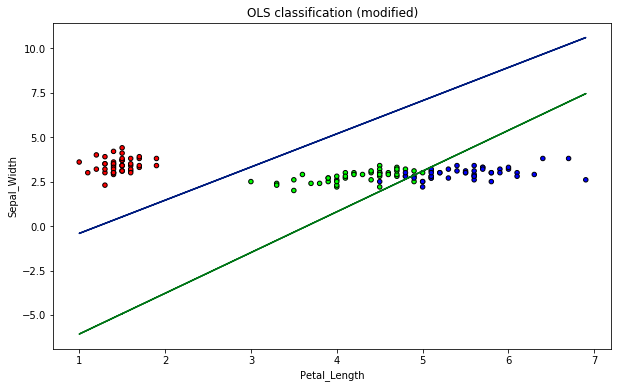

In [57]:
plt.scatter(X['Petal_Length'], X['Sepal_Width'], c=Y, cmap=cmap_bold, edgecolor='k', s=20)

plt.plot(X_train_ols['Petal_Length'],(X_train_ols['Petal_Length']*0.6083- 0.7433 )/0.3259)
plt.plot(X_train_ols['Petal_Length'],(X_train_ols['Petal_Length']*1.03396- 3.7744 )/0.45122)
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Width')
plt.title('OLS classification (modified)')
plt.show()

### Prediction of new data points using QDA classification model

Iris p len p wid s len s wid <br>
A 3.0 0.5 4.3 6.8 <br>
B 5.3 1.3 2.0 3.0 <br>

In [58]:
A = pd.DataFrame([[3.0,6.8]],columns=['Petal_Length','Sepal_Width'])
B =pd.DataFrame([[5.3,3.0]] ,columns=['Petal_Length','Sepal_Width'])

In [59]:
print(clf_qda.predict(A)) #Sentosa
print(clf_qda.predict(B)) #Virginica

[0]
[2]
